<a href="https://colab.research.google.com/github/TGB85/co2_final_assignment/blob/main/co2_question3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Which non-fossil fuel energy technology will have the best price in the future?

In [ ]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm 
from scipy import stats
from scipy.optimize import curve_fit
import seaborn as sns

In [ ]:
# path = '/content/drive/MyDrive/Colab Notebooks/co2_emissions/renewable'
path = './renewable'

## Cost of energy
Levelized cost of energy (LCOE) estimates the average cost per unit of energy generated across the lifetime of a new power plant. It is measured in 2019 US$ per kilowatt-hour.
Source: [Our World in Data](https://ourworldindata.org/grapher/levelized-cost-of-energy?country=~OWID_WRL)  
Categories: CSP, Hydro, Solar, Onshore wind, Bioenergy, Geothermal, Offshore wind.  
*CSP* stands for Concentrated Solar Power which [differs](https://www.solarfeeds.com/mag/csp-and-pv-differences-comparison/) from *solar*, referring to Solar Photovoltaic (aka solar pannels). 

In [ ]:
cost = pd.read_csv(os.path.join(path, 'cost.csv'))

In [ ]:
cost.columns

Index(['Entity', 'Code', 'Year', 'CSP LCOE (2019 USD/kWh)',
       'Hydro LCOE (2019 USD/kWh)', 'Solar LCOE (2019 USD/kWh)',
       'Onshore wind LCOE (2019 USD/kWh)', 'Bioenergy LCOE (2019 USD/kWh)',
       'Geothermal LCOE (2019 USD/kWh)', 'Offshore wind LCOE (2019 USD/kWh)'],
      dtype='object')

In [ ]:
cost.columns = ['country', 'code', 'year', 'csp', 'hydro', 'solar', 'onshore', 'bio', 'geothermal', 'offshore']

In [ ]:
cost.isnull().mean()*100

country        0.000000
code           0.000000
year           0.000000
csp           97.578692
hydro         97.578692
solar         76.271186
onshore        0.000000
bio           97.578692
geothermal    97.094431
offshore      95.157385
dtype: float64

In [ ]:
cost.describe()

,year,csp,hydro,solar,onshore,bio,geothermal,offshore
count,413.000000,10.000000,10.000000,98.000000,413.000000,10.000000,12.000000,20.000000
mean,2005.036320,0.271950,0.043537,0.174236,0.121397,0.069490,0.064043,0.143000
std,9.356538,0.062824,0.006509,0.099828,0.053497,0.009507,0.012373,0.027874
min,1983.000000,0.182300,0.035594,0.044700,0.043000,0.055425,0.042653,0.103000
25%,1998.000000,0.245100,0.038068,0.093700,0.081000,0.062064,0.057277,0.119250
50%,2006.000000,0.260700,0.043429,0.150450,0.108000,0.072182,0.066771,0.140500
75%,2013.000000,0.332225,0.046594,0.220900,0.154000,0.074955,0.072051,0.170500
max,2019.000000,0.352500,0.055025,0.473500,0.308000,0.082069,0.084536,0.183000


In [ ]:
cost.loc[~cost['csp'].isnull(), ['country', 'year', 'csp']] # csp, hydro, bio = 'World', 2010-2019
cost[~cost['solar'].isnull()].country.value_counts() # solar = 'World' + 10 countries, 2009-2019
cost[~cost['offshore'].isnull()].year.value_counts() # offshore = 'World', 2000-2019
cost[~cost['geothermal'].isnull()].year.value_counts() # geothermal = 'World', 2007-2019
cost[~cost['onshore'].isnull()].country.value_counts() # onshore = 'World' + 15 countries, 1983-2019, 37 values for World
# only keep values for World
cost.drop(cost.loc[cost['country'] != 'World'].index, inplace=True)
cost.drop(columns=['code'], inplace=True)

In [ ]:
cost.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 376 to 412
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     37 non-null     object 
 1   year        37 non-null     int64  
 2   csp         10 non-null     float64
 3   hydro       10 non-null     float64
 4   solar       10 non-null     float64
 5   onshore     37 non-null     float64
 6   bio         10 non-null     float64
 7   geothermal  12 non-null     float64
 8   offshore    20 non-null     float64
dtypes: float64(7), int64(1), object(1)
memory usage: 2.9+ KB


## Trend per energy source
[Statsmodels HP filter](https://www.statsmodels.org/dev/generated/statsmodels.tsa.filters.hp_filter.hpfilter.html)
> Downward trends: Solar pv, CSP, Onshore wind, Offshore wind & Bioenergy

### Wind

In [ ]:
def trend_per_source(df, source):
  selection = df.loc[~df[source].isnull(), ['year', source]].sort_values(by='year').set_index('year')
  cycle, trend = sm.tsa.filters.hpfilter(selection[source], 6.25)
  selection[f'{source}_trend'] = trend
  return selection

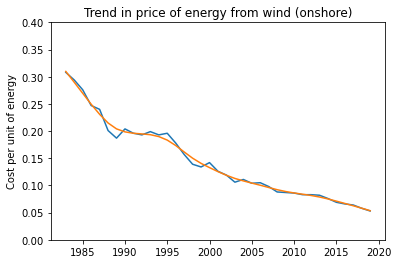

In [ ]:
onshore = trend_per_source(cost, 'onshore') 

fig, ax = plt.subplots()
ax.plot(onshore.index, onshore.onshore)
ax.plot(onshore.index, onshore.onshore_trend)
ax.set(ylabel='Cost per unit of energy', title='Trend in price of energy from wind (onshore)')
ax.set_ylim(0, 0.4)
# fig.savefig('onshore_trend.jpg')
plt.show()

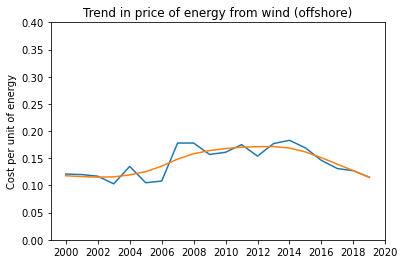

In [ ]:
offshore = trend_per_source(cost, 'offshore')
fig, ax = plt.subplots()
ax.plot(offshore.index, offshore.offshore)
ax.plot(offshore.index, offshore.offshore_trend)
ax.set(ylabel='Cost per unit of energy', title='Trend in price of energy from wind (offshore)')
ax.set_xticks(np.arange(2000, 2021, 2))
ax.set_ylim(0, 0.4)
# fig.savefig('offshore_trend.jpg')
plt.show()

### Solar

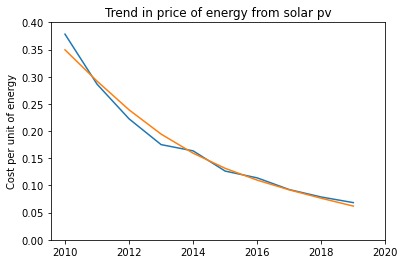

In [ ]:
# solar pv
solar = trend_per_source(cost, 'solar')
fig, ax = plt.subplots()
ax.plot(solar.index, solar.solar)
ax.plot(solar.index, solar.solar_trend)
ax.set(ylabel='Cost per unit of energy', title='Trend in price of energy from solar pv')
ax.set_xticks(np.arange(2010, 2021, 2))
ax.set_ylim(0, 0.4)
# fig.savefig('solar_trend.jpg')
plt.show()

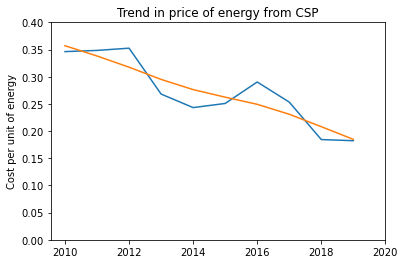

In [ ]:
# csp
csp = trend_per_source(cost, 'csp')
fig, ax = plt.subplots()
ax.plot(csp.index, csp.csp)
ax.plot(csp.index, csp.csp_trend)
ax.set(ylabel='Cost per unit of energy', title='Trend in price of energy from CSP')
ax.set_xticks(np.arange(2010, 2021, 2))
ax.set_ylim(0, 0.4)
# fig.savefig('csp_trend.jpg')
plt.show()

### Hydropower

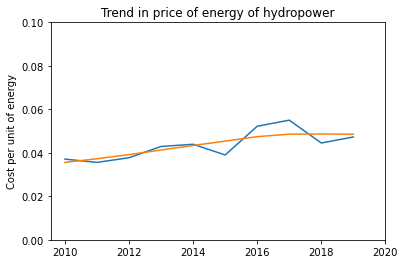

In [ ]:
hydro = trend_per_source(cost, 'hydro')
fig, ax = plt.subplots()
ax.plot(hydro.index, hydro.hydro)
ax.plot(hydro.index, hydro.hydro_trend)
ax.set(ylabel='Cost per unit of energy', title='Trend in price of energy of hydropower')
ax.set_xticks(np.arange(2010, 2021, 2))
ax.set_ylim(0, 0.1)
# fig.savefig('hydro_trend.jpg')
plt.show()

### Bio energy

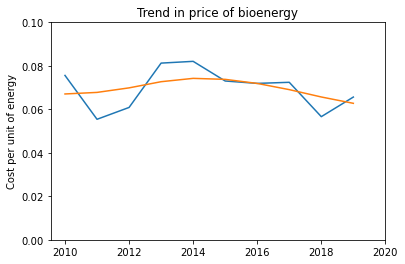

In [ ]:
bio = trend_per_source(cost, 'bio')
fig, ax = plt.subplots()
ax.plot(bio.index, bio.bio)
ax.plot(bio.index, bio.bio_trend)
ax.set(ylabel='Cost per unit of energy', title='Trend in price of bioenergy')
ax.set_xticks(np.arange(2010, 2021, 2))
ax.set_ylim(0, 0.1)
# fig.savefig('bio_trend.jpg')
plt.show()

### Geothermal

(0.0, 0.1)

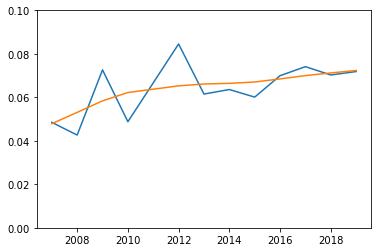

In [ ]:
geo = trend_per_source(cost, 'geothermal')
fig, ax = plt.subplots()
ax.plot(geo.index, geo.geothermal)
ax.plot(geo.index, geo.geothermal_trend)
ax.set_ylim(0, 0.1)

## Investment
Global investment in renewable energy technologies, measured in USD per year. Investment figures exclude large-scale hydropower schemes. Source: [Our World in Data](https://ourworldindata.org/grapher/investment-in-renewable-energy-by-technology?country=~OWID_WRL)  
Categories: Marine energy, Geothermal, Hydropower (small), Biofuels ('liquid biofuels'), Biomass ('biomass and waste-to-energy'), Wind, Solar.  

In [ ]:
invest = pd.read_csv(os.path.join(path, 'investment.csv'))
invest.drop(columns=['Entity', 'Code', 'Marine Energy'], inplace=True)

In [ ]:
invest.columns = ['year', 'geo_invest', 'hydro_invest', 'biofuel_invest', 'biomass_invest', 'wind_invest', 'solar_invest']

## Energy consumption
Consumption per source (TWh).  Primary energy is shown based on the ‘substitution’ method which takes account of inefficiencies in energyproduction from fossil fuels. [Our World in Data](https://ourworldindata.org/grapher/primary-sub-energy-source)    
Categories: Wind (onshore & offshore), Solar, Hydropower, Biofuels, 'Geo biomass and other'

In [ ]:
cons = pd.read_csv(os.path.join(path, 'consumption.csv'))
cons.drop(cons.loc[cons['Entity'] != 'World'].index, inplace=True)
cons.drop(columns=['Entity', 'Code'], inplace=True)

In [ ]:
cons.columns = ['year', 'wind_cons', 'hydro_cons', 'solar_cons', 'nuclear', 'bio_cons', 'geo_cons', 'coal', 'oil', 'gas']

## Solar Energy

In [ ]:
# solar pv
solar = solar.merge(cons[['year', 'solar_cons']], on='year', how='left')\
.merge(invest[['year', 'solar_invest']], on='year', how='left')

In [ ]:
solar

,year,solar,solar_trend,solar_cons,solar_invest
0,2010,0.3783,0.349452,87.795002,1.036000e+11
1,2011,0.2863,0.291931,168.910351,1.549000e+11
2,2012,0.2225,0.239026,260.554280,1.406000e+11
3,2013,0.1751,0.194451,355.711209,1.191000e+11
4,2014,0.1636,0.159277,503.281559,1.439000e+11
5,2015,0.1264,0.131479,648.519643,1.717000e+11
6,2016,0.1139,0.109721,825.820790,1.137000e+11
7,2017,0.0924,0.091858,1115.135411,NaN
8,2018,0.0787,0.076412,1433.943159,NaN
9,2019,0.0684,0.061992,1752.959449,NaN


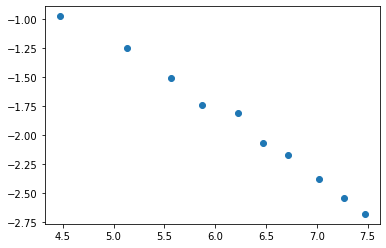

In [ ]:
# plt.scatter(solar.solar_cons, solar.solar)
plt.scatter(np.log(solar.solar_cons), np.log(solar.solar))

In [ ]:
solar.corr()

,year,solar,solar_trend,solar_cons,solar_invest
year,1.000000,-0.941127,-0.970137,0.968654,0.213295
solar,-0.941127,1.000000,0.991128,-0.840637,-0.330916
solar_trend,-0.970137,0.991128,1.000000,-0.882579,-0.276933
solar_cons,0.968654,-0.840637,-0.882579,1.000000,0.156507
solar_invest,0.213295,-0.330916,-0.276933,0.156507,1.000000


array([-0.1012982 ,  0.80071074])

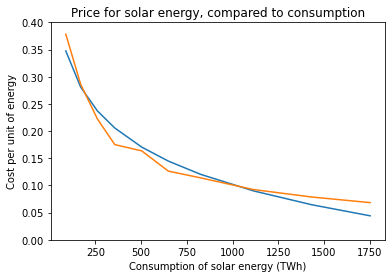

In [ ]:
def func(x, a, c): 
    return a * np.log(x) + c # array([-0.1012982 ,  0.80071074])

x = solar.solar_cons
y = solar.solar

popt, pcov = curve_fit(func, x, y)
fig, ax = plt.subplots()
plt.plot(x, func(x, *popt))
plt.plot(x, y)
ax.set(ylabel='Cost per unit of energy', xlabel='Consumption of solar energy (TWh)', title='Price for solar energy, compared to consumption')
ax.set_ylim(0, 0.4)
fig.savefig('solar_consumption.jpg')
popt

In [ ]:
# For x = 2000
-0.1012982*np.log(2000) + 0.80071074

0.030753002472814206

In [ ]:
residuals = y-func(x, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
r_squared = 1-(ss_res/ss_tot)
r_squared

0.9624295665165115

### Wind

In [ ]:
# onshore
onshore = onshore.merge(cons[['year', 'wind_cons']], on='year', how='left')\
.merge(invest[['year', 'wind_invest']], on='year', how='left')

In [ ]:
onshore.describe()

,year,onshore,onshore_trend,wind_cons,wind_invest
count,37.000000,37.000000,37.000000,37.000000,1.300000e+01
mean,2001.000000,0.144541,0.144541,656.042141,7.752308e+10
std,10.824355,0.070353,0.069811,1000.461360,3.244968e+10
min,1983.000000,0.053000,0.053555,0.091097,1.960000e+10
25%,1992.000000,0.086000,0.086167,13.147811,6.110000e+10
50%,2001.000000,0.126000,0.125427,105.947676,8.420000e+10
75%,2010.000000,0.196000,0.194775,903.359720,1.016000e+11
max,2019.000000,0.308000,0.309734,3511.696050,1.242000e+11


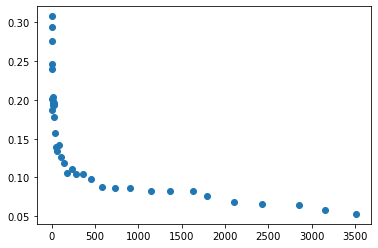

In [ ]:
# plt.scatter(onshore.wind_invest, onshore.onshore)
plt.scatter(onshore.wind_cons, onshore.onshore)

In [ ]:
onshore.corr()

,year,onshore,onshore_trend,wind_cons,wind_invest
year,1.000000,-0.961917,-0.969386,0.823003,0.935390
onshore,-0.961917,1.000000,0.996400,-0.686957,-0.963509
onshore_trend,-0.969386,0.996400,1.000000,-0.692570,-0.953510
wind_cons,0.823003,-0.686957,-0.692570,1.000000,0.870135
wind_invest,0.935390,-0.963509,-0.953510,0.870135,1.000000


In [ ]:
model_w = sm.OLS.from_formula('onshore ~ np.log(wind_cons)', data=onshore).fit() # r_sq_adj 96.6
# model_w = sm.OLS.from_formula('onshore ~ wind_invest', data=onshore).fit() # r_sq_adj 92.2
model_w.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                onshore   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     1020.
Date:                Mon, 18 Jul 2022   Prob (F-statistic):           1.77e-27
Time:                        15:56:01   Log-Likelihood:                 109.23
No. Observations:                  37   AIC:                            -214.5
Df Residuals:                      35   BIC:                            -211.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.2389      0.004     65.536      0.000       0.231       0.246
np.log(wind_cons)    -0.0224      0.001    -31.940      0.000      -0.024      -0.021
==============================================================================
Omnibus:                        3.926   Durbin-Watson:                   0.720
Prob(Omnibus):                  0.140   Jarque-Bera (JB):                2.872
Skew:                          -0.348   Prob(JB):                        0.238
Kurtosis:                       4.174   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

array([-0.02240028,  0.23885685])

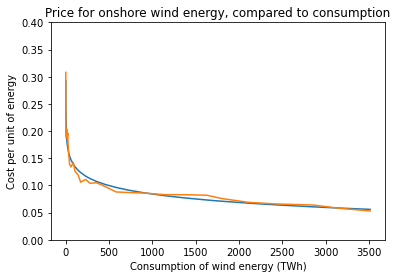

In [ ]:
def func(x, a, b):
    return a * np.log(x) + b

x = onshore.wind_cons
y = onshore.onshore

popt, pcov = curve_fit(func, x, y)

fig, ax = plt.subplots()
plt.plot(x, func(x, *popt))
plt.plot(x, y)
ax.set(ylabel='Cost per unit of energy', xlabel='Consumption of wind energy (TWh)', title='Price for onshore wind energy, compared to consumption')
ax.set_ylim(0, 0.4)
fig.savefig('onshore_consumption.jpg')
popt

In [ ]:
residuals = y-func(x, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
r_squared = 1-(ss_res/ss_tot)
r_squared

0.9668298370684146

In [ ]:
# For x = 2000
display(-0.02240028 * np.log(2000) + 0.23885685)
onshore.loc[onshore.wind_cons > 1900]

0.06859450665356867

,year,onshore,onshore_trend,wind_cons,wind_invest
32,2015,0.069,0.071128,2103.319152,1.242000e+11
33,2016,0.066,0.066925,2419.802622,1.125000e+11
34,2017,0.064,0.062631,2850.777372,NaN
35,2018,0.058,0.058137,3155.241097,NaN
36,2019,0.053,0.053555,3511.696050,NaN


In [ ]:
# offshore
offshore = offshore.merge(cons[['year', 'wind_cons']], on='year', how='left')\
.merge(invest[['year', 'wind_invest']], on='year', how='left')

In [ ]:
offshore.describe()

,year,offshore,offshore_trend,wind_cons,wind_invest
count,20.00000,20.000000,20.000000,20.000000,1.300000e+01
mean,2009.50000,0.143000,0.143000,1200.434628,7.752308e+10
std,5.91608,0.027874,0.022482,1103.296792,3.244968e+10
min,2000.00000,0.103000,0.115064,87.278985,1.960000e+10
25%,2004.75000,0.119250,0.119006,267.581865,6.110000e+10
50%,2009.50000,0.140500,0.143762,813.743822,8.420000e+10
75%,2014.25000,0.170500,0.165058,1872.989178,1.016000e+11
max,2019.00000,0.183000,0.171586,3511.696050,1.242000e+11


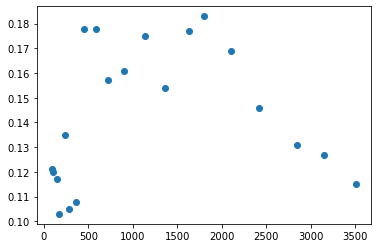

In [ ]:
# plt.scatter(offshore.wind_invest, offshore.offshore)
plt.scatter(offshore.wind_cons, offshore.offshore)

In [ ]:
offshore.corr()

,year,offshore,offshore_trend,wind_cons,wind_invest
year,1.000000,0.352359,0.436856,0.952751,0.935390
offshore,0.352359,1.000000,0.869503,0.137662,0.658607
offshore_trend,0.436856,0.869503,1.000000,0.178352,0.814067
wind_cons,0.952751,0.137662,0.178352,1.000000,0.870135
wind_invest,0.935390,0.658607,0.814067,0.870135,1.000000


In [ ]:
model_off = sm.OLS.from_formula('offshore ~ wind_cons + wind_invest', data=offshore).fit() # r_sq_adj: 41.9

# The condition number is large. This might indicate that there are strong multicollinearity or other numerical problems.
model_off.summary()

C:\Users\tammi\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               offshore   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     5.329
Date:                Fri, 15 Jul 2022   Prob (F-statistic):             0.0266
Time:                        18:28:53   Log-Likelihood:                 34.210
No. Observations:                  13   AIC:                            -62.42
Df Residuals:                      10   BIC:                            -60.73
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.1056      0.016      6.453      0.000       0.069       0.142
wind_cons   -2.071e-05   1.59e-05     -1.303      0.222   -5.61e-05    1.47e-05
wind_invest  9.351e-13   3.58e-13      2.609      0.026    1.37e-13    1.73e-12
==============================================================================
Omnibus:                        4.092   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.129   Jarque-Bera (JB):                1.230
Skew:                          -0.097   Prob(JB):                        0.541
Kurtosis:                       1.506   Cond. No.                     2.48e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.48e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

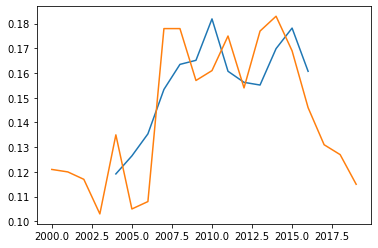

In [ ]:
x = offshore.wind_cons
y = offshore.offshore

plt.plot(offshore.year, model_off.params[0] + x*model_off.params[1] + model_off.params[2]*offshore.wind_invest)
plt.plot(offshore.year, y)